In [36]:
# importing essential libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"Uber Request Data (1).csv")
df.head(5) 

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [4]:
# make sure that number of duplicate rows are zero
sum(df.duplicated(subset = "Request id")) == 0   # check if IDs are duplicated even if the rest of the rows are different


True

**let's look at the dimensions of the dataframe**

In [5]:
df.shape

(6745, 6)

**check for NA values in dataset**

In [6]:
print (df.isnull().sum())  
print (df.isnull().values.any())
print (df.isnull().values.sum())

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64
True
6564


**checking the % of NAs columnwise**

In [7]:
df.isnull().sum()*100/df.shape[0] 

Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [9]:
df.describe()

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


**convert 'Request timestamp' column to datetime object**

In [10]:
print (df['Request timestamp'].isnull().values.any())
print (df['Request timestamp'].isnull().values.sum())

False
0


In [11]:
df["Request timestamp"] = df["Request timestamp"].astype(str)
df['Request timestamp'] = df['Request timestamp'].str.replace("/", "-")
df['Request timestamp'] = pd.to_datetime(df["Request timestamp"], dayfirst=True)

In [12]:
# convert 'Drop timestamp' column to datetime oject
df["Drop timestamp"] = df["Drop timestamp"].astype(str)
df['Drop timestamp'] = df['Drop timestamp'].str.replace("/", "-")
df['Drop timestamp'] = pd.to_datetime(df["Drop timestamp"], dayfirst=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [14]:
# extract the hour from the request time
req_hour = df["Request timestamp"].dt.hour

df["req_hour"] = req_hour


In [15]:
df["req_hour"]


0       11
1       17
2        9
3       21
4        8
        ..
6740    23
6741    23
6742    23
6743    23
6744    23
Name: req_hour, Length: 6745, dtype: int64

In [16]:
#extract the day from the request time
req_day = df["Request timestamp"].dt.day

df["req_day"] = req_day

In [37]:
# aggregate count plot for all days w.r.t. to Pickup point
sns.factorplot(x = "req_hour", hue = "Pickup point", data = df, kind = "count")

AttributeError: module 'seaborn' has no attribute 'factorplot'

# Case Study
# Identify the hours with highest traffic

In [38]:
# creating a time slot for various time period of day
def time_period(x):
    'divide the time of the day into four categories'
    if x < 5:
        return "Pre_Morning"
    elif 5 <= x < 10:
        return "Morning_Rush"
    elif 10 <= x < 17:
        return "Day_Time"
    elif 17 <= x < 22:
        return "Evening_Rush"
    else:
        
        return "Late_Night"

df['time_slot'] = df.req_hour.apply(lambda x: time_period(x))

In [19]:
df.time_slot.value_counts()

Evening_Rush    2342
Morning_Rush    2103
Day_Time        1224
Pre_Morning      578
Late_Night       498
Name: time_slot, dtype: int64

In [20]:
# another way to look at the trips made in each time slot
Pre_Morning = print (df.time_slot[df.time_slot == "Pre_Morning"].value_counts())
Morning_Rush = print (df.time_slot[df.time_slot == "Morning_Rush"].value_counts())
Day_Time = print (df.time_slot[df.time_slot == "Day_Time"].value_counts())
Evening_Rush = print (df.time_slot[df.time_slot == "Evening_Rush"].value_counts())
Late_Night = print (df.time_slot[df.time_slot == "Late_Night"].value_counts())

Pre_Morning    578
Name: time_slot, dtype: int64
Morning_Rush    2103
Name: time_slot, dtype: int64
Day_Time    1224
Name: time_slot, dtype: int64
Evening_Rush    2342
Name: time_slot, dtype: int64
Late_Night    498
Name: time_slot, dtype: int64


<AxesSubplot: xlabel='time_slot', ylabel='count'>

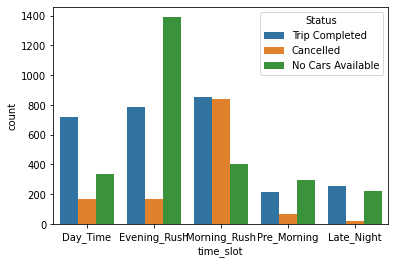

In [21]:
# plot time slot w.r.t. status and identify the most critical problems before Uber
sns.countplot(x = "time_slot", hue = "Status", data = df)

<AxesSubplot: xlabel='Pickup point', ylabel='count'>

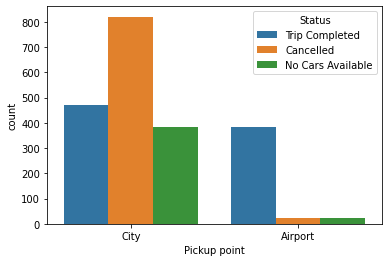

In [22]:
# as you can see in the above plot the higest number of cancellations are in the "Morning Rush" time slot
df_morning_rush = df[df.time_slot == "Morning_Rush"]
sns.countplot(x = "Pickup point", hue = "Status", data = df_morning_rush)

<AxesSubplot: xlabel='Pickup point', ylabel='count'>

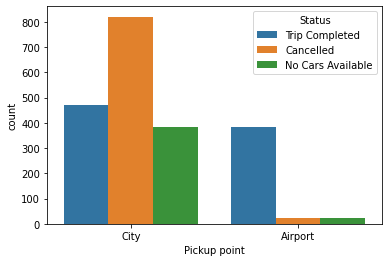

In [23]:
df_evening_rush = df[df.time_slot == "Evening_Rush"]
sns.countplot(x = "Pickup point", hue = "Status", data = df_morning_rush)

In [24]:
# let's look at the supply and demand in evening rush hour in the city
df_city_completed_evening_rush = df_evening_rush.loc[(df_evening_rush["Pickup point"] == "City") & (df_evening_rush["Status"] == "Trip Completed")]
len(df_city_completed_evening_rush.index)

411

In [25]:
df_city_evening_rush  = df_evening_rush.loc[(df_evening_rush["Pickup point"] == "City")]
len(df_city_evening_rush.index)

542

In [26]:
# let's look at the supply and demand in evening rush hour from the airport
df_airport_completed_evening_rush = df_evening_rush.loc[(df_evening_rush["Pickup point"] == "Airport") & (df_evening_rush["Status"] == "Trip Completed")]
len(df_airport_completed_evening_rush.index)

373

In [27]:
df_airport_evening_rush  = df_evening_rush.loc[(df_evening_rush["Pickup point"] == "Airport")]
len(df_airport_evening_rush.index)

1800

In [28]:
# let's look at the severity problem (of demand and supply) at each location by looking at cancellation of cab in each of the pickup location in evening rush
df_airport_cancelled_evening_rush  = df_evening_rush.loc[(df_evening_rush["Pickup point"] == "Airport") & (df_evening_rush["Status"] == "Cancelled")]
len(df_airport_cancelled_evening_rush.index)

106

In [29]:
df_city_cancelled_evening_rush = df_evening_rush.loc[(df_evening_rush["Pickup point"] == "City") & (df_evening_rush["Status"] == "Cancelled")]
len(df_city_cancelled_evening_rush.index)

60

In [30]:
# severity of problem by location in Morning Rush (Unavailability of Cars)
df_airport_unavailable_morning_rush  = df_morning_rush.loc[(df_morning_rush["Pickup point"] == "Airport") & (df_morning_rush["Status"] == "No Cars Available")]
len(df_airport_unavailable_morning_rush.index)

21

In [31]:
df_city_unavailable_morning_rush  = df_morning_rush.loc[(df_morning_rush["Pickup point"] == "City") & (df_morning_rush["Status"] == "No Cars Available")]
len(df_city_unavailable_morning_rush.index)

385

In [32]:
# severity of problem by location in Evening Rush (Unavailability of Cars)
df_airport_unavailable_evening_rush  = df_evening_rush.loc[(df_evening_rush["Pickup point"] == "Airport") & (df_evening_rush["Status"] == "No Cars Available")]
len(df_airport_unavailable_evening_rush.index)

1321

In [33]:
df_city_unavailable_evening_rush  = df_evening_rush.loc[(df_evening_rush["Pickup point"] == "City") & (df_evening_rush["Status"] == "No Cars Available")]
len(df_city_unavailable_evening_rush.index)

71

In [34]:
# percentage breakup of status on the basis of pickup location
# Status of trips @ Morning Rush where pickup point is City
df_city = df.loc[(df["Pickup point"] == "City") & (df.time_slot == "Morning_Rush")]
df_city_count = pd.DataFrame(df_city.Status.value_counts())

df_city_count

,Status
Cancelled,820
Trip Completed,472
No Cars Available,385
